In [1]:
import numpy as np
import pandas as pd

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from keras.utils import to_categorical

In [3]:
labels = pd.read_csv('labels.csv')
img_path = './train/'

In [4]:
labels = labels.assign(img_path = lambda x : img_path + x['id']+'.jpg')

In [5]:
labels.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [7]:
# image size check
from PIL import Image

img_size = []
for image in labels['img_path']:
    im=Image.open(image)
    img_size.append(im.size)
    
img_size.sort(reverse=True)
img_size

[(3264, 2448),
 (3264, 2448),
 (2740, 1732),
 (2560, 1920),
 (2388, 2562),
 (2304, 1728),
 (2272, 1704),
 (2272, 1704),
 (2240, 1680),
 (2240, 1488),
 (2156, 1604),
 (2135, 1720),
 (2097, 1910),
 (2080, 1544),
 (2048, 1536),
 (2048, 1536),
 (2048, 1536),
 (2048, 1536),
 (2048, 1536),
 (2048, 1536),
 (2048, 1536),
 (2048, 1536),
 (2048, 1536),
 (2048, 1360),
 (1979, 1443),
 (1909, 1273),
 (1905, 1619),
 (1888, 1348),
 (1632, 1232),
 (1616, 1212),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1536, 1024),
 (1536, 1024),
 (1504, 1000),
 (1495, 1186),
 (1448, 984),
 (1388, 1879),
 (1348, 1007),
 (1317, 1297),
 (1280, 1182),
 (1280, 1024),
 (1280, 960),
 (1280, 960),
 (1280, 960),
 (1280, 853),
 (1280, 844),
 (1250, 765),
 (1201, 1507),
 (1200, 1800),
 (1200, 1600),
 (1188, 1230),
 (1177, 942),
 (1173, 795),
 (1152, 864),
 (1068, 1316),
 (1024, 768),
 (1024, 768),
 (1024, 768),
 (1024, 768),
 (1024, 768),
 (1024, 768),
 (1024, 768),
 (1024, 767),
 (1009, 1073),
 (1000, 821),
 (1000, 790),


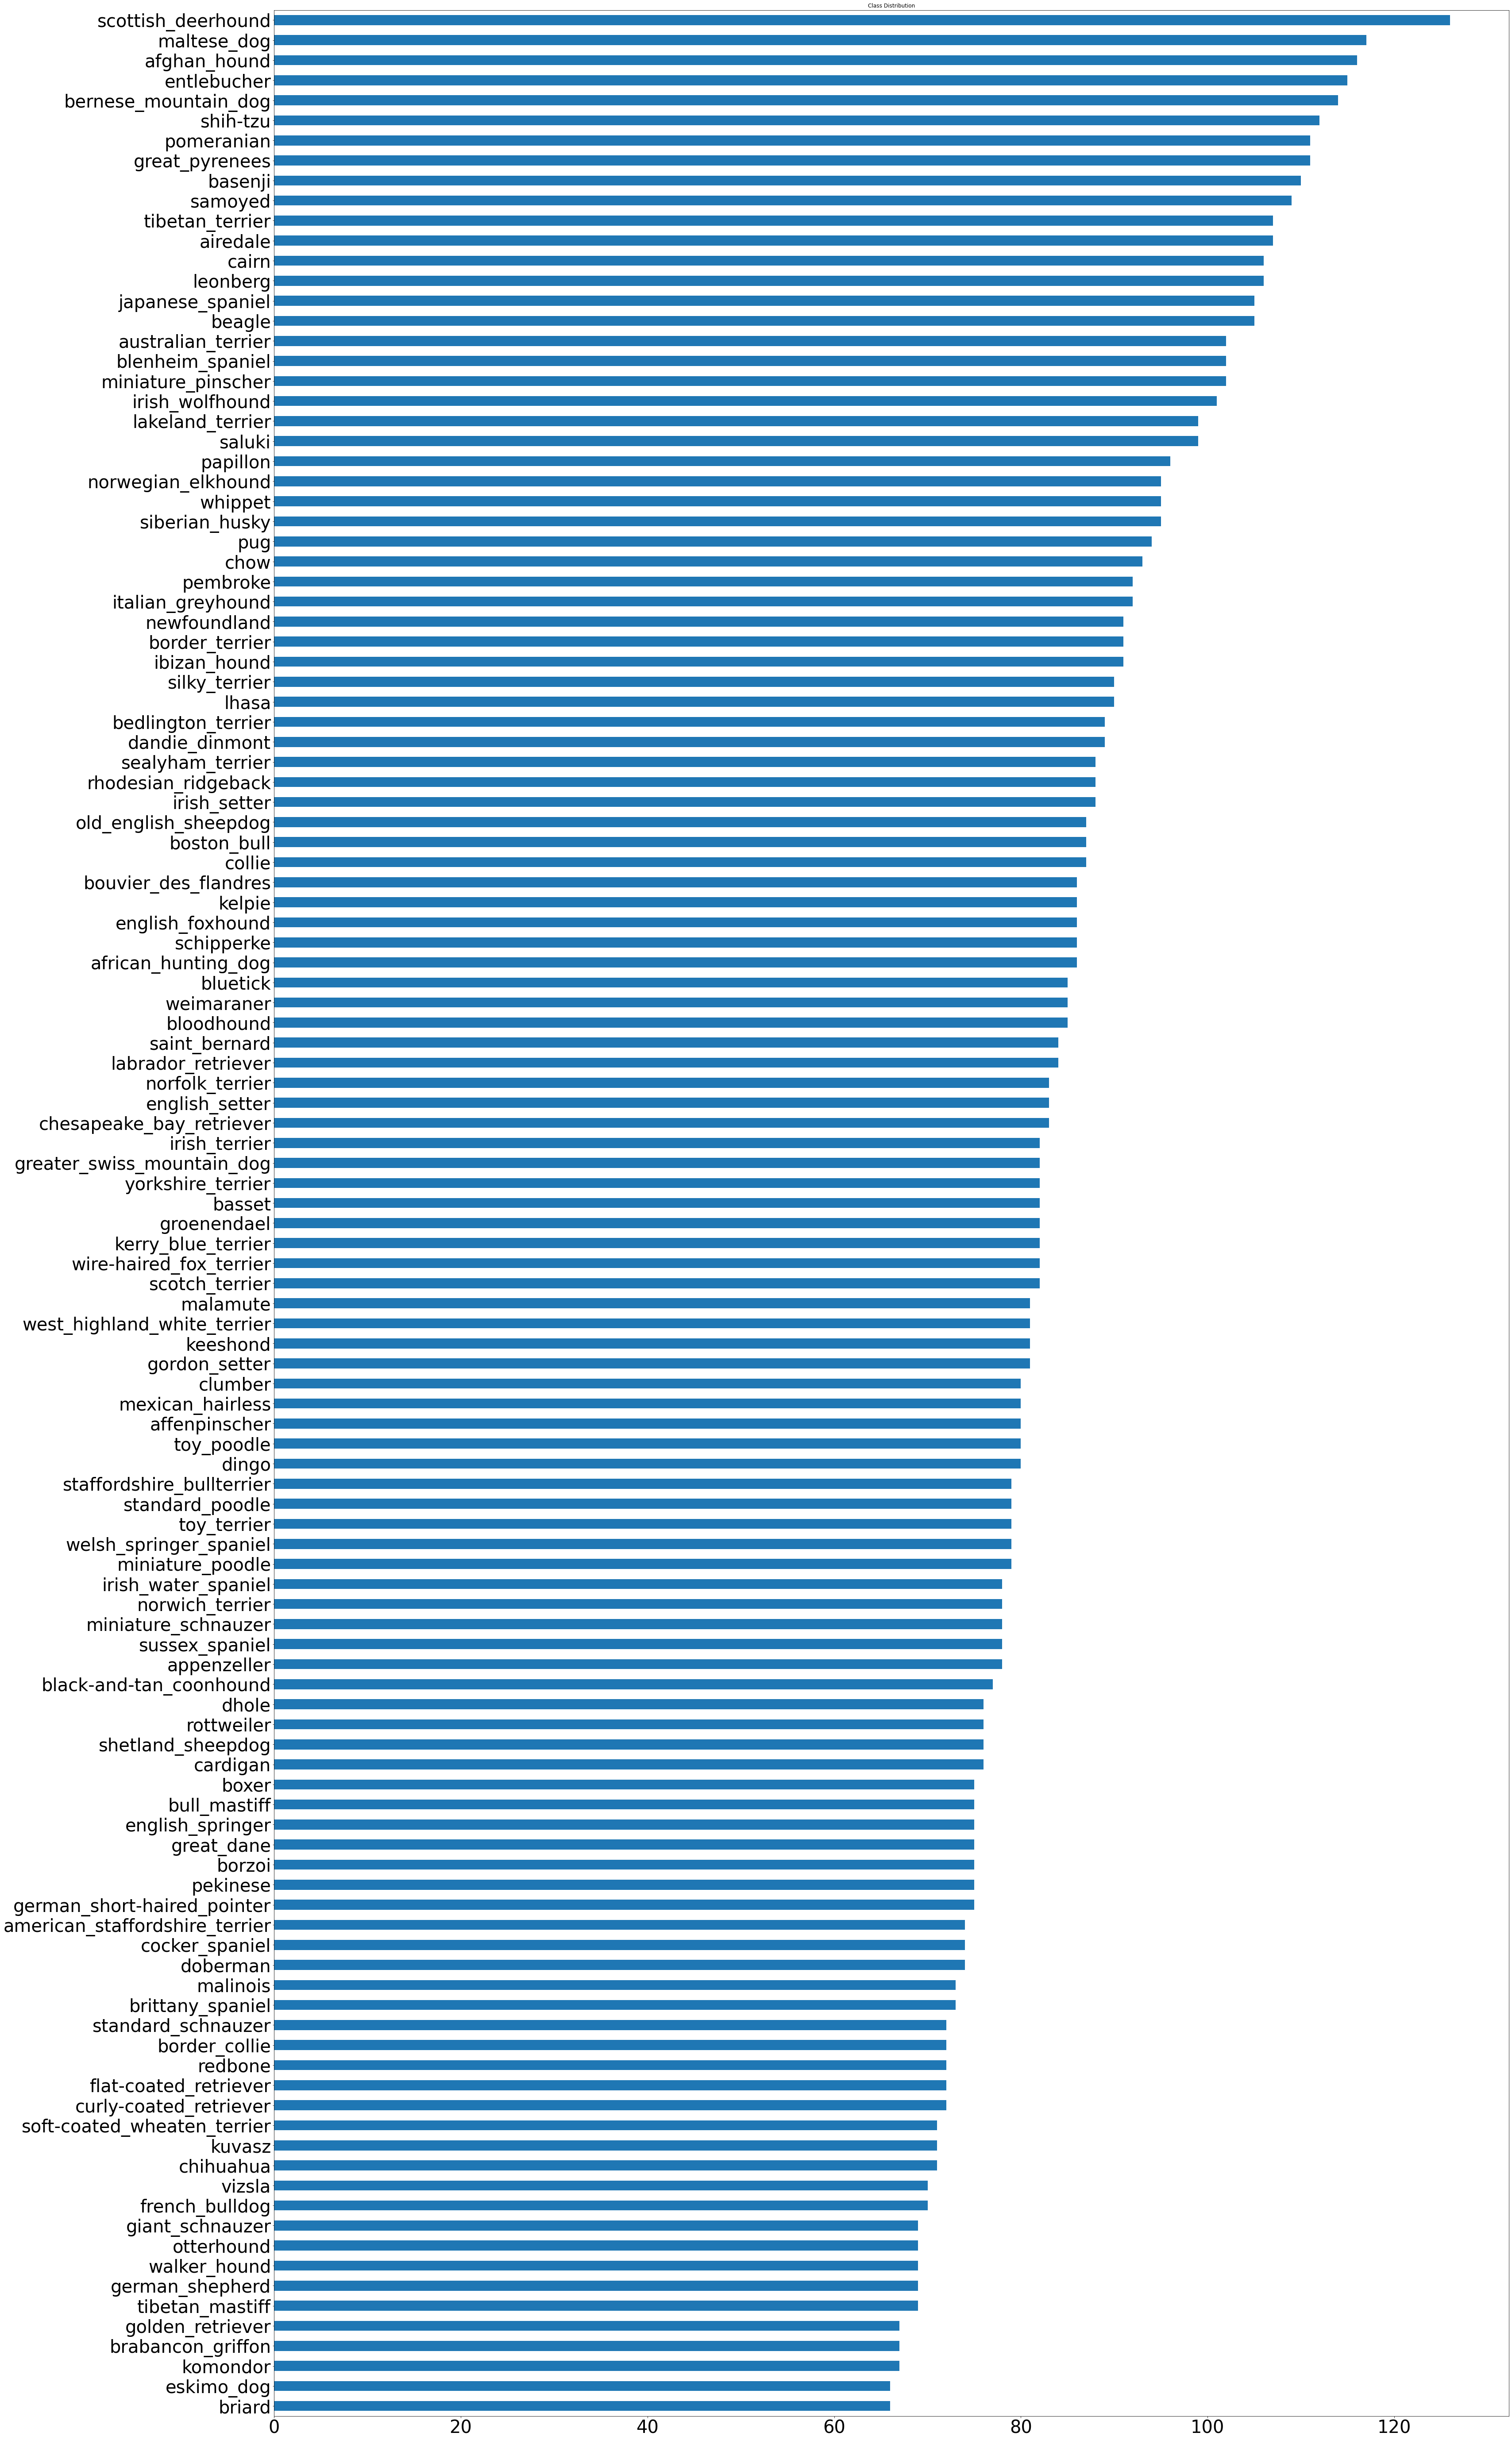

In [8]:
labelplot = pd.value_counts(labels['breed'],ascending=True).plot(kind='barh',fontsize="40",title="Class Distribution",figsize=(50,100))

In [11]:
img_pixel=np.array([img_to_array(load_img(img, target_size=(256, 256))) for img in labels['img_path'].values.tolist()])

KeyboardInterrupt: 

In [10]:
img_pixel.shape

(10222, 299, 299, 3)

In [12]:
image_to_array

NameError: name 'image_to_array' is not defined

In [13]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_datagen.flow